# MODI character recognition

Link for MODI characters = https://aksharamukha.appspot.com/describe/Modi

# Importing required libraries

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import os

# Reading data from files

In [5]:
path = "/content/drive/MyDrive/MODI character recognition/custom_modi_data/"
files = os.listdir(path)

In [6]:
files = [int(i) for i in files]
files.sort()
print(files)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
X = []
Y = []

for img_fold in files:
    img_path = path+str(img_fold)
    for img_name in os.listdir(img_path):
        print(f"reading class :: {img_fold}")
        img = cv.imread(img_path+"/"+img_name,0) # here 2nd argument '0' converts 3D array to 2D array
        # we have to resize the image because it is very large
        img = cv.resize(img,(96,96))
        X.append(img)
        Y.append(img_fold)
#     print("***********next**********")

print("Dataset Created Successfully")

Streaming output truncated to the last 5000 lines.
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading class :: 37
reading c

In [9]:
print(set(Y))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}


# Splitting dataset into train and test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 143)

In [12]:
X_train = np.asarray(X_train)
y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(Y_test)

In [13]:
print(set(y_train))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}


In [14]:
X_train.shape

(19868, 96, 96)

# Shaping the dataset according to model

In [15]:
X_train = X_train.reshape((X_train.shape[0], 96, 96, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 96, 96, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


# Converting labels to 1 and 0

In [16]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Checking if ytrain has successfully categorised

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [18]:
np.argmax(y_train,axis=1)

array([36, 17, 16, ..., 34,  5,  2])

# Creating model function and adding layers to model

In [19]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(96, 96, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Training the model

In [25]:
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
100/100 [==============================] - 183s 2s/step - loss: 3.7513 - accuracy: 0.0481 - val_loss: 3.3495 - val_accuracy: 0.1429
Epoch 2/20
100/100 [==============================] - 188s 2s/step - loss: 2.8899 - accuracy: 0.2600 - val_loss: 2.6288 - val_accuracy: 0.3127
Epoch 3/20
100/100 [==============================] - 191s 2s/step - loss: 2.1911 - accuracy: 0.4235 - val_loss: 2.0221 - val_accuracy: 0.4550
Epoch 4/20
100/100 [==============================] - 187s 2s/step - loss: 1.6593 - accuracy: 0.5553 - val_loss: 1.6142 - val_accuracy: 0.5686
Epoch 5/20
100/100 [==============================] - 183s 2s/step - loss: 1.2869 - accuracy: 0.6487 - val_loss: 1.3588 - val_accuracy: 0.6378
Epoch 6/20
100/100 [==============================] - 181s 2s/step - loss: 1.0075 - accuracy: 0.7210 - val_loss: 1.1834 - val_accuracy: 0.6869
Epoch 7/20
100/100 [==============================] - 182s 2s/step - loss: 0.8104 - accuracy: 0.7729 - val_loss: 1.0485 - val_accuracy: 0.7250

# Model Test score and accuracy

In [26]:
score = model.evaluate(X_test,y_test,verbose=0)

In [27]:
print("test score :: ",score[0]*100)
print("test accuracy :: ",score[1]*100)

test score ::  91.92008972167969
test accuracy ::  85.30300259590149


# Predicting for 1st image

In [29]:
test_img1 = cv.imread(path+"1/380.png",0)
test_img1 = cv.resize(test_img1,(96,96))
test_img1

array([[255, 255, 254, ..., 252, 253, 253],
       [255, 255, 255, ..., 253, 253, 253],
       [255, 255, 255, ..., 253, 253, 253],
       ...,
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254]], dtype=uint8)

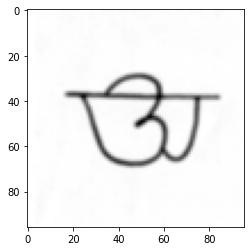

In [30]:
plt.imshow(test_img1,cmap='gray')

In [31]:
type(test_img1)

numpy.ndarray

In [32]:
test_img1.shape

(96, 96)

In [33]:
test_img1 = test_img1.reshape((1, 96, 96, 1)).astype('float32')

In [34]:
test_img1.shape

(1, 96, 96, 1)

In [35]:
test_img1 = test_img1/255

In [36]:
test_img1

array([[[[1.        ],
         [1.        ],
         [0.99607843],
         ...,
         [0.9882353 ],
         [0.99215686],
         [0.99215686]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]]]], dtype=float32)

In [37]:
result = model.predict(test_img1)

In [38]:
result[0]

array([1.16718096e-32, 9.99784410e-01, 8.48211771e-23, 2.03477373e-18,
       1.75222911e-14, 3.00146007e-06, 1.98681158e-11, 1.50066562e-22,
       4.30317653e-28, 1.68421337e-07, 2.12471394e-04, 2.74187530e-15,
       6.62452493e-24, 1.49434538e-25, 3.63620160e-18, 2.98632240e-13,
       3.89554222e-11, 1.00698283e-10, 5.11759407e-23, 1.10296065e-14,
       4.92374372e-21, 4.13018338e-22, 5.41416181e-19, 8.00628777e-18,
       1.30685323e-22, 3.42949280e-11, 2.49206561e-20, 1.05149897e-26,
       4.57969071e-22, 6.65819937e-30, 2.92523625e-27, 5.86959164e-22,
       7.07788092e-25, 1.42694149e-19, 1.64435863e-23, 1.05940313e-17,
       3.54326168e-21, 3.08976899e-21, 5.18568937e-22, 7.86687991e-16,
       3.14339774e-36, 1.16531953e-20, 4.35961163e-12, 1.33136213e-24,
       1.81830022e-15, 1.01097730e-19, 1.93613875e-12], dtype=float32)

In [39]:
print(np.argmax(result[0]))

1


# Predicting for 2nd image

In [40]:
test_img2 = cv.imread(path+"2/380.png",0)
test_img2 = cv.resize(test_img2,(96,96))

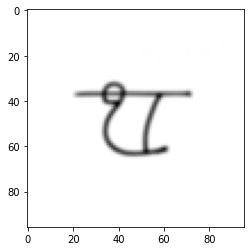

In [41]:
plt.imshow(test_img2,cmap='gray')

In [42]:
test_img2 = test_img2.reshape((1, 96, 96, 1)).astype('float32')

In [43]:
test_img2.shape

(1, 96, 96, 1)

In [44]:
test_img2 = test_img2/255

In [45]:
result2 = model.predict(test_img2)

In [46]:
result2[0]

array([6.9407645e-19, 7.5368225e-06, 9.9856454e-01, 2.9534737e-09,
       6.5595103e-12, 9.9485808e-11, 1.2645252e-12, 1.2520374e-03,
       1.6528514e-08, 1.8922017e-11, 1.1599930e-12, 7.0466265e-11,
       6.5414605e-07, 8.5089366e-11, 2.3288043e-09, 1.8525082e-08,
       6.9177464e-10, 2.9714622e-07, 3.5804559e-10, 3.7421191e-08,
       1.7599911e-16, 4.0893504e-11, 4.3584043e-09, 8.0627940e-09,
       2.8315541e-09, 5.3472634e-13, 2.3614685e-10, 7.9954617e-08,
       6.8625175e-12, 1.4929728e-07, 3.1418284e-09, 3.5567190e-08,
       2.0825319e-09, 2.8778420e-06, 5.8028565e-11, 1.8239750e-12,
       1.4811906e-05, 5.1903515e-10, 3.7841325e-10, 1.5125299e-04,
       2.0251603e-10, 2.8472289e-06, 1.0966529e-06, 7.5436137e-09,
       4.0244243e-14, 6.2212183e-07, 1.1271328e-06], dtype=float32)

In [47]:
np.argmax(result2[0])

2

# Predicting for 3rd image

In [48]:
test_img3 = cv.imread(path+'3/380.png',0)
test_img3 = cv.resize(test_img3,(96,96))

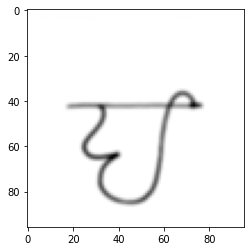

In [49]:
plt.imshow(test_img3,cmap='gray')

In [50]:
test_img3 = test_img3.reshape((1, 96, 96, 1)).astype('float32')

In [51]:
test_img3.shape

(1, 96, 96, 1)

In [52]:
test_img3 = test_img3/255

In [53]:
result3 = model.predict(test_img3)

In [54]:
result3[0]

array([3.61704699e-18, 3.78921151e-13, 3.59230029e-12, 9.91426945e-01,
       6.56985166e-03, 4.43883076e-14, 4.33555726e-11, 3.82416265e-10,
       7.46921103e-08, 7.94527555e-09, 1.02411114e-10, 5.86891929e-07,
       2.36901876e-08, 5.22410838e-18, 4.87852390e-07, 7.06862791e-13,
       1.50686687e-14, 2.07035355e-05, 3.10520359e-11, 2.62038770e-06,
       9.93360116e-11, 9.15872322e-10, 1.50277000e-08, 1.02831134e-18,
       1.75793176e-08, 2.96861828e-07, 1.05899612e-11, 6.05348549e-11,
       1.90585095e-03, 1.22981103e-09, 4.00156660e-19, 5.92684773e-05,
       1.84183693e-11, 4.01241914e-06, 9.05739206e-10, 6.49692355e-10,
       1.03155999e-08, 4.21051007e-11, 1.15598416e-12, 6.92325193e-06,
       1.08254794e-10, 6.58635325e-19, 3.33077352e-08, 2.31486456e-06,
       4.72479552e-14, 3.10052428e-10, 1.27894667e-10], dtype=float32)

In [55]:
np.argmax(result3[0])

3

# Casually predicting

In [56]:
test_img4 = cv.imread('/content/drive/MyDrive/MODI character recognition/testing_imgs/1_rotated.png')
test_img4 = cv.cvtColor(test_img4,cv.COLOR_BGR2GRAY)
test_img4 = cv.resize(test_img4,(96,96))

In [57]:
test_img4.shape

(96, 96)

In [ ]:
plt.imshow(test_img4,cmap='gray')

In [59]:
test_img4 = test_img4.reshape((1, 96, 96, 1)).astype('float32')

In [60]:
test_img4.shape

(1, 96, 96, 1)

In [62]:
test_img4 = test_img4/255

In [63]:
result4 = model.predict(test_img4)

In [64]:
result4[0]

array([4.4808619e-28, 2.3792658e-15, 2.7635639e-18, 1.6172608e-10,
       7.0336443e-09, 1.8104926e-07, 2.3405616e-07, 8.4838714e-09,
       9.9999738e-01, 1.0296904e-11, 1.9907677e-10, 5.6419664e-09,
       7.7826751e-15, 3.4634686e-19, 1.0785343e-07, 5.1743344e-18,
       5.8601607e-25, 2.3649120e-17, 5.3335492e-10, 4.7291061e-07,
       4.5842810e-16, 7.6086146e-26, 7.1175534e-22, 2.8451029e-28,
       1.3729916e-13, 1.1049574e-08, 5.0251568e-24, 1.7083673e-09,
       6.7381656e-09, 4.4547062e-14, 2.7969927e-11, 3.2943876e-07,
       3.2958686e-12, 4.9811860e-12, 1.3127190e-06, 8.1614369e-14,
       8.8974325e-13, 5.1776136e-25, 2.0980201e-16, 5.0013048e-18,
       4.0850153e-14, 1.0096622e-08, 6.4881453e-16, 2.8314917e-14,
       7.7908536e-20, 1.7126809e-16, 2.9457110e-15], dtype=float32)

In [66]:
np.argmax(result4[0])

8